# A minimal ALF run

In this bare-bones example we use the [pyALF](https://git.physik.uni-wuerzburg.de/ALF/pyALF) interface to run the canonical Hubbard model on a default configuration: a $6\times6$ square grid, with interaction strength $U=4$ and inverse temperature $\beta = 5$.  

Bellow we go through the steps for performing the simulation and outputting observables.

---

**1.** Import `Simulation` class from the `py_alf` python module, which provides the interface with ALF:

In [1]:
import os
from py_alf import Simulation              # Interface with ALF
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

**2.** Create an instance of `Simulation`, setting parameters as desired:

In [84]:
sim = Simulation(
    "Hubbard",                             # Hamiltonian
    {                                      # Model and simulation parameters for each Simulation instance
    "Model": "Hubbard",                    # Base model
    "Lattice_type": "Square",             # Lattice type
        'L1': 4,                         #    Lattice length in the first unit vector direction
        'L2': 4},                         #    Lattice length in the second unit vector direction
    alf_dir=os.getenv('ALF_DIR', './ALF'), # Directory with ALF source code. Gets it from 
                                           # environment variable ALF_DIR, if present
)

**3.** Compile ALF, downloading it first from the [ALF repository](https://git.physik.uni-wuerzburg.de:ALF) if not found locally. This may take a few minutes:

In [5]:
sim.compile()                              # Compilation needs to be performed only once

Compiling ALF... Done.


**4.** Perform the simulation as specified in `sim`:

In [6]:
sim.run()                                  # Perform the actual simulation in ALF

Prepare directory "/home/stafusa/ALF/pyALF21/Notebooks/ALF_data/Hubbard_Square_L1=4_L2=4" for Monte Carlo run.
Create new directory.
Run /home/stafusa/ALF/pyALF21/Notebooks/ALF/Prog/Hubbard.out


**5.** Perform some simple analyses:

In [7]:
sim.analysis()                             # Perform default analysis; list observables

Analysing Ener_scal
Analysing Part_scal
Analysing Pot_scal
Analysing Kin_scal
Analysing Den_eq
Analysing SpinZ_eq
Analysing Green_eq
Analysing SpinXY_eq
Analysing SpinT_eq
Analysing SpinXY_tau
Analysing SpinZ_tau
Analysing Den_tau
Analysing Green_tau
Analysing SpinT_tau


In [8]:
A = [[0.95453127, 0.60107383, 0.52684672, 0.61333189, 0.86846177,
          1.12311798], [0.60808559, 0.47795484, 0.33056695, 0.42261288,
          0.61281969, 0.67734359], [0.53987917, 0.30891021, 0.20425232,
          0.30891021, 0.53987917, 0.59796713], [0.61281969, 0.42261288,
          0.33056695, 0.47795484, 0.60808559, 0.67734359], [0.86846177,
          0.61333189, 0.52684672, 0.60107383, 0.95453127, 1.12311798],
    [1.05780792, 0.69364701, 0.64513157, 0.69364701, 1.05780792,
          4.46407261]]
B = [0.95453127, 0.60107383, 0.52684672, 0.61333189, 0.86846177,
          1.12311798, 0.60808559, 0.47795484, 0.33056695, 0.42261288,
          0.61281969, 0.67734359, 0.53987917, 0.30891021, 0.20425232,
          0.30891021, 0.53987917, 0.59796713, 0.61281969, 0.42261288,
          0.33056695, 0.47795484, 0.60808559, 0.67734359, 0.86846177,
          0.61333189, 0.52684672, 0.60107383, 0.95453127, 1.12311798,
          1.05780792, 0.69364701, 0.64513157, 0.69364701, 1.05780792,
          4.46407261]
Ba = np.array(B).reshape((6, 6))

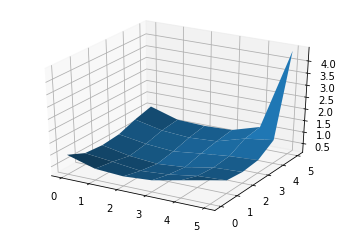

In [9]:
nx, ny = 6, 6
x = range(nx)
y = range(ny)
hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D

ha.plot_surface(X, Y, Ba)
plt.show()

In [10]:
sim.analysis(python_version=True)

### Analyzing /home/stafusa/ALF/pyALF21/Notebooks/ALF_data/Hubbard_Square_L1=4_L2=4 ###
/home/stafusa/ALF/pyALF21/Notebooks
Scalar observables:
Ener_scal
Part_scal
Pot_scal
Kin_scal
Histogram observables:
Equal time observables:
Den_eq
SpinZ_eq
Green_eq
SpinXY_eq
SpinT_eq
Time displaced observables:
SpinXY_tau
SpinZ_tau
Den_tau
Green_tau
SpinT_tau


**6.** Store computed observables list:

In [11]:
obs = sim.get_obs()                        # Dictionary for the observables

/home/stafusa/ALF/pyALF21/Notebooks/ALF_data/Hubbard_Square_L1=4_L2=4/Kin_scalJ 1
/home/stafusa/ALF/pyALF21/Notebooks/ALF_data/Hubbard_Square_L1=4_L2=4/Part_scalJ 1
/home/stafusa/ALF/pyALF21/Notebooks/ALF_data/Hubbard_Square_L1=4_L2=4/Ener_scalJ 1
/home/stafusa/ALF/pyALF21/Notebooks/ALF_data/Hubbard_Square_L1=4_L2=4/Pot_scalJ 1


In [12]:
obs_py = sim.get_obs(python_version=True)

In [13]:
obs['Kin_scalJ']

{'sign': array([1., 0.]), 'obs': array([[-21.082582,   0.057512]])}

In [14]:
obs_py

{'Ener_scal_sign': 1.0,
 'Ener_scal_sign_err': 0.0,
 'Ener_scal0': -13.29489259154191,
 'Ener_scal0_err': 0.07764896907306669,
 'Part_scal_sign': 1.0,
 'Part_scal_sign_err': 0.0,
 'Part_scal0': 15.999999999999831,
 'Part_scal0_err': 1.264461657268399e-13,
 'Pot_scal_sign': 1.0,
 'Pot_scal_sign_err': 0.0,
 'Pot_scal0': 7.78768960988406,
 'Pot_scal0_err': 0.022233806177234083,
 'Kin_scal_sign': 1.0,
 'Kin_scal_sign_err': 0.0,
 'Kin_scal0': -21.08258220142593,
 'Kin_scal0_err': 0.05751236779973668,
 'Den_eqK': array([[[0.24589415, 0.17027079, 0.24506084, 0.33322818, 0.17242952,
          0.00673596, 0.17242952, 0.24648516, 0.24506084, 0.17027079,
          0.24589415, 0.33322818, 0.33245789, 0.24409302, 0.33245789,
          0.39784789]]]),
 'Den_eqK_err': array([[[0.00114998, 0.00086305, 0.00042519, 0.00192486, 0.0015622 ,
          0.00059912, 0.0015622 , 0.00160394, 0.00042519, 0.00086305,
          0.00114998, 0.00192486, 0.00052288, 0.00111913, 0.00052288,
          0.00082119]]]),
 

In [85]:
def print_some_params():
    from default_variables import default_params, params_list
    from py_alf import _convert_par_to_str as to_str
    print("Model: " + to_str(sim.ham_name))
    print("Defaults -- " + "Lattice: " + 
          to_str(default_params(sim.ham_name)['VAR_Lattice']['Lattice_type'][0]) +
          ", L1: " + to_str(default_params(sim.ham_name)['VAR_Lattice']['L1'][0]) +
          ", L2: " + to_str(default_params(sim.ham_name)['VAR_Lattice']['L2'][0]));
    print("Specified -- ", end=""); print(sim.sim_dict)
    #print("Specified -- " + "Lattice: " + 
    #      to_str(sim.sim_dict['Lattice_type']) + 
    #      ", L1: " + to_str((sim.sim_dict)['L1']) + 
    #      ", L2: " + to_str((sim.sim_dict)['L2']))

print_some_params()

Model: "Hubbard"
Defaults -- Lattice: "Square", L1: 6, L2: 6
Specified -- {'Model': 'Hubbard', 'Lattice_type': 'Square', 'L1': 4, 'L2': 4}


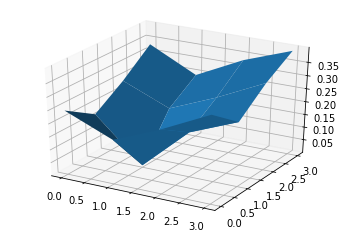

In [86]:
def plotObs2D(obs):
    #print(obs)
    from default_variables import default_params
    if "L1" in sim.sim_dict:
        L1 = (sim.sim_dict)['L1']
    else:
        L1 = default_params(sim.ham_name)['VAR_Lattice']['L1'][0]
    if "L2" in sim.sim_dict:
        L2 = (sim.sim_dict)['L2']
    else:
        L2 = default_params(sim.ham_name)['VAR_Lattice']['L2'][0]
    obs_square = np.array(obs[0][0]).reshape((L1, L2))
    x = range(L1)
    y = range(L2)
    X, Y = np.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
    figure = plt.figure()
    subplot = figure.add_subplot(111, projection='3d')
    subplot.plot_surface(X, Y, obs_square)
    plt.show()

plotObs2D(obs_py['Den_eqK'])

which are available for further analyses. For instance, the internal energy of the system (and its error) is accessed by:

In [ ]:
print(obs_py['Ener_scal0'], obs_py['Ener_scal0_err'])

In [ ]:
obs['Ener_scalJ']['obs']

---
**7.** Running again: The simulation can be resumed to increase the precision of the results.

In [ ]:
sim.run()
sim.analysis()
obs2 = sim.get_obs()
print(obs2['Ener_scalJ']['obs'])
print("\nRunning again reduced the error from ", obs['Ener_scalJ']['obs'][0][1]," to ", obs2['Ener_scalJ']['obs'][0][1], ".")

**Note**: To run a fresh simulation - instead of performing a refinement over previous run(s) - the Monte Carlo run directory should be deleted before rerunning.

---
## Exercises
1. Rerun once again and check the new improvement in precision.
2. Look at a few other observables (`sim.analysis()` outputs the names of those available).
3. Change the lattice size by adding, e.g., `"L1": 4,` and `"L2": 1,` to the simulation parameters definitions of `sim` (step 2).